## ANWERS 6.2

### 1. Import Data
### 2. Create a correlation matrix heatmap (colored).
### 3. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
### 4. Create a pair plot of the entire data set
### 5. Create a categorical plot
### 6. Revisit the questions and Add new ones base don new findings
### 7. Define any hypotheses that you can at this point.

### 1. Import Data

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os 

In [2]:
# Import your data
path = r'C:\Users\carol\Documents\Airbnb' # Create a path
df_listings_merged = pd.read_pickle(os.path.join(path,'Prepared Data','df_listings_merged.pkl')) #Import your cleaned data

### 2. Create a correlation matrix heatmap (colored).

In [3]:
df_listings_merged.shape

(26924, 28)

In [4]:
df_listings_merged.columns

Index(['listing_id', 'listing_url', 'description', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications', 'amenities', 'beds',
       'accommodates', 'bathrooms_text', 'maximum_nights', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [61]:
# from df_listings_merged calculate the median (50th percentile) of the 'price' column, ignoring NaN values

median_price = df_listings_merged['price'].median()
df_listings_merged['price'].fillna(median_price, inplace=True)

C:\Users\carol\AppData\Local\Temp\ipykernel_16744\1657708478.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings_merged['price'].fillna(median_price, inplace=True)


In [62]:
df_listings_merged.describe()

,listing_id,host_total_listings_count,beds,#_guest,maximum_nights,host_id,latitude,longitude,price,minimum_nights,#_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,#_amenities,num_verifications,#_verif_methods
count,2.692400e+04,26920.000000,21565.000000,26924.000000,26924.000000,2.692400e+04,26924.000000,26924.000000,26924.000000,26924.000000,26924.000000,21068.000000,26924.000000,26924.000000,26924.000000,26924.000000,26924.0,26924.0
mean,5.269994e+17,47.226560,1.788175,3.117219,552.132001,2.374991e+08,40.421619,-3.694061,129.995246,7.597497,44.198113,1.891740,27.582751,159.010474,13.799398,25.696479,0.0,0.0
std,4.833560e+17,148.764635,1.570993,1.918675,439.949477,1.954564e+08,0.023563,0.027804,268.432242,30.729157,83.545015,1.958487,62.142400,126.602476,21.048907,13.513605,0.0,0.0
min,2.185300e+04,1.000000,0.000000,1.000000,1.000000,7.952000e+03,40.331397,-3.833071,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,3.467118e+07,2.000000,1.000000,2.000000,300.000000,4.562144e+07,40.409340,-3.707540,71.000000,1.000000,1.000000,0.410000,1.000000,35.000000,0.000000,14.000000,0.0,0.0
50%,6.694947e+17,5.000000,1.000000,2.000000,365.000000,1.988944e+08,40.420300,-3.701083,100.000000,2.000000,10.000000,1.260000,3.000000,151.000000,4.000000,26.000000,0.0,0.0
75%,9.942962e+17,26.000000,2.000000,4.000000,1125.000000,4.342087e+08,40.431812,-3.685456,136.000000,4.000000,48.000000,2.800000,16.000000,271.000000,20.000000,35.000000,0.0,0.0
max,1.178999e+18,9520.000000,40.000000,16.000000,11111.000000,5.833361e+08,40.535530,-3.545904,21000.000000,1125.000000,1060.000000,28.070000,290.000000,365.000000,268.000000,85.000000,0.0,0.0


In [5]:
# Convert the amenities from string to a list
df_listings_merged['amenities'] = df_listings_merged['amenities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Count the number of amenities for each row
df_listings_merged['#_amenities'] = df_listings_merged['amenities'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Sum the total number of amenities
total_amenities = df_listings_merged['#_amenities'].sum()

print(f"Total number of amenities: {total_amenities}")

Total number of amenities: 691852


In [6]:
# Rename columns whose names are too long

df_listings_merged.rename(columns = {'host_is_superhost' : 'superhost', 'host_verifications': 'verifications_methods', 
                     'name': 'host_name', 'number_of_reviews': '#_reviews','accommodates':'#_guest'},
                      inplace = True)

In [25]:
# Convert the verification from string to a list
df_listings_merged['verifications_methods'] = df_listings_merged['verifications_methods'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Count the number of verifications_methods for each row
df_listings_merged['#_verif_methods'] = df_listings_merged['verifications_methods'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Sum the total number of amenities
total_amenities = df_listings_merged['#_verif_methods'].sum()

print(f"Total number of amenities: {total_amenities}")

Total number of amenities: 0


In [21]:
df_listings_merged.head()

,listing_id,listing_url,description,superhost,host_total_listings_count,verifications_methods,amenities,beds,#_guest,bathrooms_text,...,#_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,#_amenities,num_verifications,#_verif_methods
0,1104967621421098322,https://www.airbnb.com/rooms/1104967621421098322,nan,f,1.0,[],[],0.0,2,1 bath,...,2,2024-05-08,0.61,1,2,2,nan,0,0,0
1,930941073152690361,https://www.airbnb.com/rooms/930941073152690361,Rent room for loose nights or weekends to a c...,f,4.0,[],[Wifi],1.0,2,1 bath,...,3,2023-10-04,0.28,2,185,3,nan,1,0,0
2,51647382,https://www.airbnb.com/rooms/51647382,"This special place is close to everything, mak...",f,2.0,[],"[Outdoor dining area, TV, Free parking on prem...",3.0,1,1 shared bath,...,186,2024-05-29,5.40,2,356,65,nan,8,0,0
3,1026072412626070839,https://www.airbnb.com/rooms/1026072412626070839,Enjoy the simplicity of this quiet and central...,f,1.0,[],"[Lock on bedroom door, Wifi, Kitchen]",2.0,3,1 shared bath,...,1,2023-11-20,0.14,1,12,1,nan,3,0,0
4,766423030884644417,https://www.airbnb.com/rooms/766423030884644417,Enjoy a stylish experience at this centrally-l...,f,4.0,[],"[Washer, Lock on bedroom door, Air conditionin...",1.0,1,1 shared bath,...,0,nan,NaN,1,364,0,nan,7,0,0


In [29]:
# Check the available columns
print(df_listings_merged.columns)

Index(['listing_id', 'listing_url', 'description', 'superhost',
       'host_total_listings_count', 'verifications_methods', 'amenities',
       'beds', '#_guest', 'bathrooms_text', 'maximum_nights', 'host_name',
       'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       '#_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', '#_amenities', 'num_verifications',
       '#_verif_methods'],
      dtype='object')


In [16]:
df_listings_merged.dtypes

listing_id                          int64
listing_url                        object
description                        object
superhost                          object
host_total_listings_count         float64
verifications_methods              object
amenities                          object
beds                              float64
#_guest                             int64
bathrooms_text                     object
maximum_nights                      int64
host_name                          object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
#_reviews                           int64
last_review                        object
reviews_per_month                 

In [30]:
# List of the columns you want to include in the new DataFrame
columns_to_keep = [
    'host_total_listings_count',       
    'beds',                             
    '#_guest',                           
    'latitude',                         
    'longitude',                        
    'price',                            
    'minimum_nights', 'maximum_nights',                    
    '#_reviews',                         
    'reviews_per_month',               
    'calculated_host_listings_count',      
    'availability_365',                  
    '#_amenities',           
]

In [31]:
# Create a new DataFrame with only the specified columns
df_EDA = df_listings_merged[columns_to_keep]

In [32]:
# Create a correlation matrix using pandas

df_EDA.corr()

,host_total_listings_count,beds,#_guest,latitude,longitude,price,minimum_nights,maximum_nights,#_reviews,reviews_per_month,calculated_host_listings_count,availability_365,#_amenities
host_total_listings_count,1.000000,0.079136,0.090256,0.014597,-0.024005,0.071987,0.043069,0.069097,-0.078200,-0.075328,0.611251,0.180223,-0.026372
beds,0.079136,1.000000,0.673170,0.014049,-0.011965,0.178231,-0.032761,0.137791,0.093282,-0.037957,0.123903,0.015312,0.186152
#_guest,0.090256,0.673170,1.000000,0.023543,-0.023800,0.213019,-0.036091,0.108615,0.105328,0.061815,0.149311,0.083000,0.251094
latitude,0.014597,0.014049,0.023543,1.000000,0.228229,0.026105,0.026602,0.001225,-0.046279,-0.029444,0.069546,0.007074,0.033051
longitude,-0.024005,-0.011965,-0.023800,0.228229,1.000000,-0.006605,-0.011371,-0.032196,-0.036208,0.024338,-0.025016,-0.009122,0.010269
price,0.071987,0.178231,0.213019,0.026105,-0.006605,1.000000,-0.016226,0.041786,-0.008340,-0.045158,0.023582,0.075432,0.031257
minimum_nights,0.043069,-0.032761,-0.036091,0.026602,-0.011371,-0.016226,1.000000,0.015275,-0.060980,-0.103270,0.061319,0.026231,-0.043713
maximum_nights,0.069097,0.137791,0.108615,0.001225,-0.032196,0.041786,0.015275,1.000000,0.096725,-0.090565,0.083491,0.061381,0.060889
#_reviews,-0.078200,0.093282,0.105328,-0.046279,-0.036208,-0.008340,-0.060980,0.096725,1.000000,0.473579,-0.089037,0.003527,0.279868
reviews_per_month,-0.075328,-0.037957,0.061815,-0.029444,0.024338,-0.045158,-0.103270,-0.090565,0.473579,1.000000,-0.054459,0.063222,0.204453


In [34]:
# Create a subset excluding the "Date" and "id" columns

sub = df_EDA[['price', '#_reviews','#_guest', 'minimum_nights', 'latitude','longitude','host_total_listings_count','#_amenities' ]]

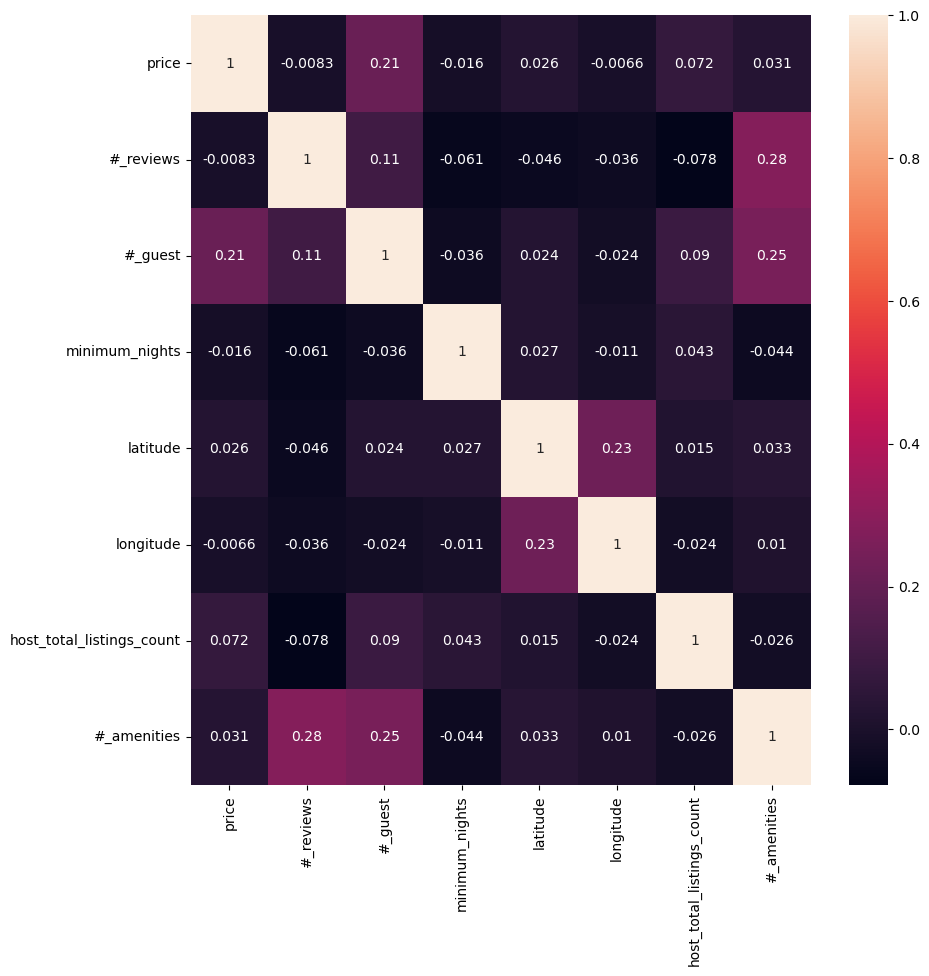

In [35]:
# Create a subplot with matplotlib (f means figure and ax representthe axes = function (size)
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # annot=true This argument adds annotations to the heatmap. 
#place the correlation coefficients onto the heatmap.

In [69]:
#Export heatmap

corr.figure.savefig(os.path.join(path,'Visualizations', 'heatmap.png'))

**NOTE**

**#_amenities and #_guest**
Correlation: 0.25
Interpretation: There is a moderate positive correlation between these variables. This suggest that th ehigher the number of guest the more needs they might have and therefore more amenities the accomodation must have. 


**#_amenities and #_reviews**
Correlation: 0.28
Interpretation: There is a moderate positive correlation between # of amenities and # reviews received. Indicating that when the accomodation has a higher number of amenities teh listing tends to get more reviews. 


**price and #_guest:**

Correlation: 0.21
Interpretation: There's a moderate positive correlation between the number of guests a listing can accommodate and the price. This suggests that as the capacity for guests increases, the price tends to be higher, which is logical since larger accommodations typically cost more.

**#_reviews and #_guest**

Correlation: 0.11
Interpretation: There is a weak positive correlation here, indicating that listings with more guest capacity might slightly tend to have more reviews. 

### General Observations:

**Low Correlation Values**: The overall low correlation values (close to 0) across most pairs of variables indicate that there are few strong linear relationships in this dataset. This suggests that other factors not included in this matrix might be influencing these variables, or that the relationships between these variables are nonlinear.



### 3. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

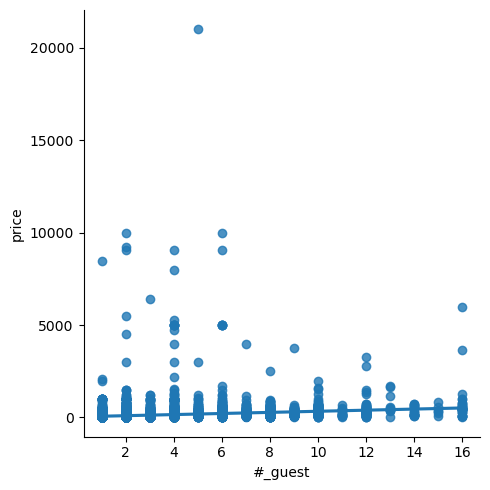

In [36]:
# Create a scatterplot #_price and #_guest

sns.lmplot(x = '#_guest', y = 'price', data = df_listings_merged)

**NOTE** 

**Clustering**: The data points tend to cluster in specific regions. There's a dense cluster around the lower price range and lower guest capacities. This suggests that many listings are for smaller accommodations with relatively affordable prices.

**Outliers**: A few points are significantly distant from the main clusters. These could represent luxury accommodations with high prices and large guest capacities, or they might be outliers due to errors or unique circumstances.

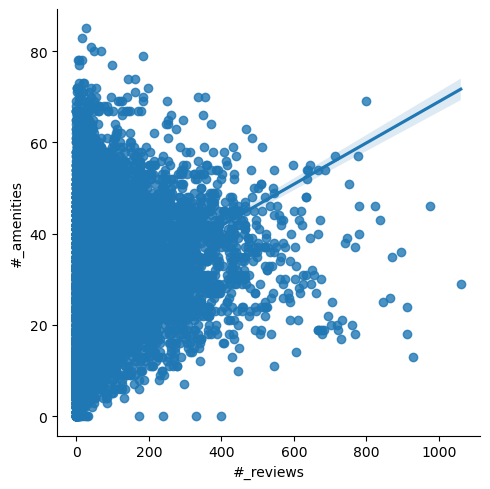

In [37]:
# Create a scatterplot #_amenities and #_reviews

sns.lmplot(x = '#_reviews', y = '#_amenities', data = df_listings_merged)

**NOTE**
**#_amenities and #_reviews**
There is a positive correlation between the number of reviews and the quantity of amenities. Customers seem to value establishments with a wide range of services and express their satisfaction through reviews.

This graph could be useful for businesses seeking to optimize their services

### 4. Create a pair plot of the entire data set

In [38]:
sub_2=sub[['#_amenities','#_reviews','price','#_guest','host_total_listings_count']]

In [39]:
df_listings_merged.shape

(26924, 31)

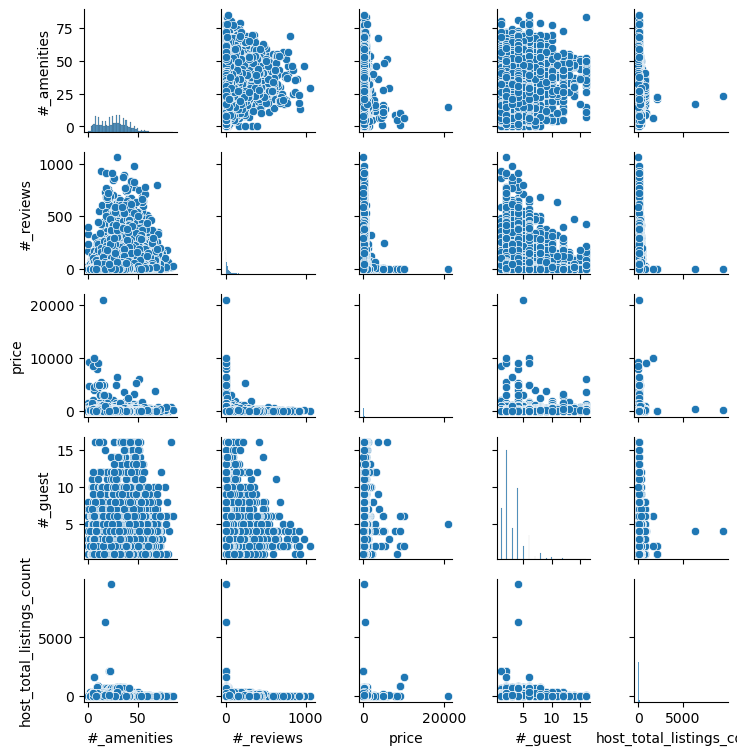

In [40]:
#Create a pair plot

g=sns.pairplot(sub_2,height=1)
plt.gcf().set_size_inches(8, 8)

**NOTE**

Correlations: Some pairs of variables show clear correlations:

**Price vs. Amenities**: There seems to be a positive correlation, suggesting that properties with more amenities tend to have higher prices.

**Price vs. Reviews**: A weak positive correlation might be present, indicating that properties with higher reviews might have slightly higher prices.

**Amenities vs. Reviews**: A positive correlation is visible, suggesting that properties with more amenities might receive more reviews.

**Possible Interpretations:**

Pricing Factors: Amenities and, to a lesser extent, reviews seem to be factors influencing pricing. Properties with more amenities and positive reviews tend to be priced higher.

### 5. Create a categorical plot

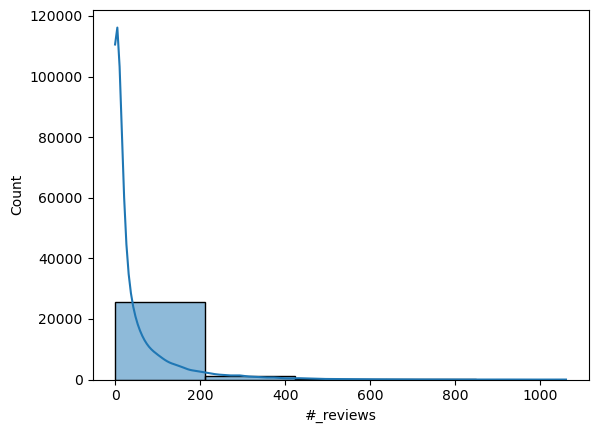

In [64]:
hit_reviews=sns.histplot(df_listings_merged['#_reviews'], bins =5, kde = True)

In [68]:
#Export hit_reviews

hit_reviews.figure.savefig(os.path.join(path,'Visualizations', 'hist_reviews.png'))

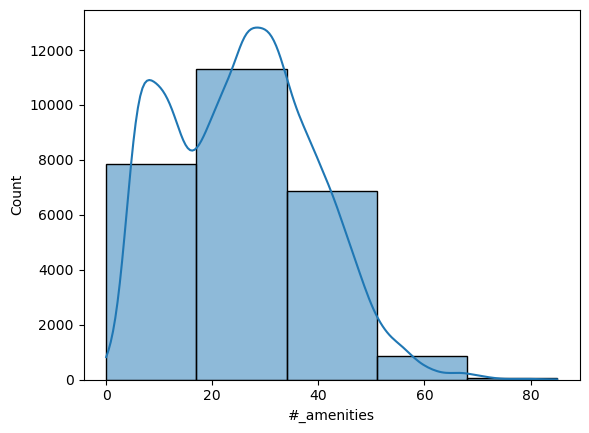

In [48]:
hit_amenities=sns.histplot(df_listings_merged['#_amenities'], bins =5, kde = True)

The histogram suggests that the majority of properties in this dataset offer a moderate number of amenities, with a decreasing frequency of properties offering a larger number of amenities. 

In [66]:
#Export hit_amenities

hit_amenities.figure.savefig(os.path.join(path,'Visualizations', 'hist_amenities.png'))

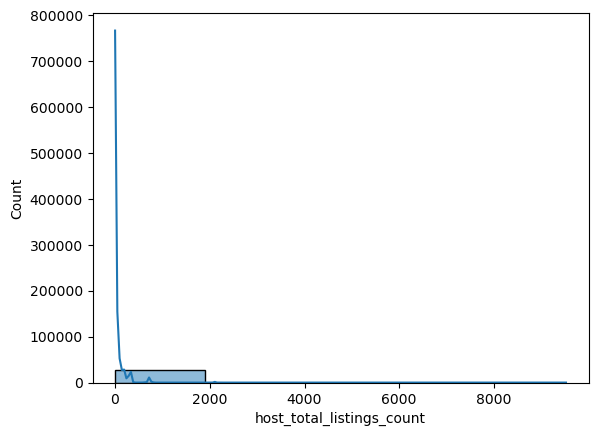

In [65]:
hit_listings_count=sns.histplot(df_listings_merged['host_total_listings_count'], bins =5, kde = True)

The histogram suggests that the majority of hosts in this dataset have a small number of listings, with a decreasing frequency of hosts with larger numbers of listings.

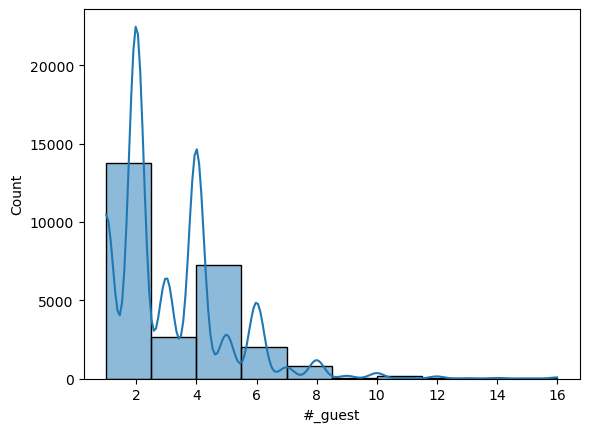

In [53]:
hit_guests=sns.histplot(df_listings_merged['#_guest'], bins =10, kde = True)

The histogram suggests that the majority of listings in this dataset are for a small number of guests, with a decreasing frequency of larger accommodations.

In [67]:
#Export hit_guests

hit_guests.figure.savefig(os.path.join(path,'Visualizations', 'hist_guests.png'))

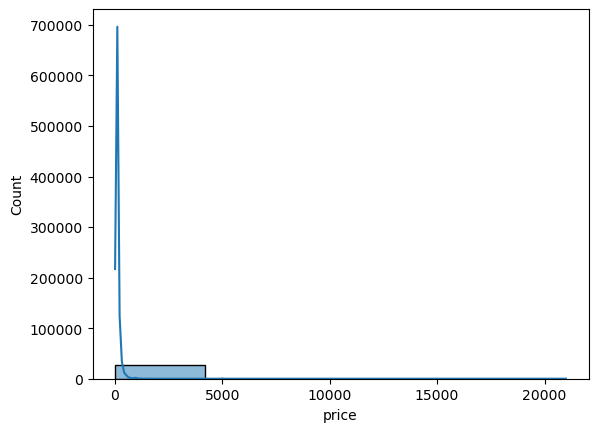

In [56]:
hit_price=sns.histplot(df_listings_merged['price'], bins =5, kde = True)

The histogram suggests that the pricing of listings in this dataset is highly skewed towards lower prices, with a small number of listings having significantly higher prices. 

### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far

**Are the number of amenities affecting the price?** There seems to be a positive correlation, suggesting that properties with more amenities tend to have higher prices.

**Properties pricing** highly skewed towards lower prices, with a small number of listings having significantly higher prices. 

**Having many reviews affects the pricing?** A weak positive correlation might be present, indicating that properties with higher reviews might have slightly higher prices.

### Add any new questions that may have arisen based on the early findings in your visual exploration.

Does the host response time affect the reviews?

What is the breakdown based on the property types?

Are there more density of certain property types in certain districts?

### 7. Define any hypotheses that you can at this point.

**Hypothesis**
The proliferation of Airbnb and other P2P platforms in Madrid has contributed to the housing crisis by increasing property prices, reducing the availability of long-term rentals, and displacing residents.


**Explanation**
This hypothesis suggests that the rise of P2P platforms like Airbnb has had a negative impact on the Madrid housing market, leading to:

**Increased property prices**: As property owners find it more profitable to rent their properties on short-term platforms like Airbnb, the demand for long-term rentals decreases, leading to higher prices for those remaining.

**Reduced availability of long-term rentals**: The conversion of residential properties into short-term rentals reduces the overall supply of long-term rental housing, making it more difficult and expensive for residents to find suitable accommodation.

**Displacement of residents**: As property prices rise and long-term rental options become scarce, residents may be forced to move out of the city due to affordability issues, leading to displacement.